In [1]:
import numpy as np
import pandas as pd 
import time

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\kapil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
X_scaled.shape

(400, 2)

In [13]:
#Batch Size = 400 -> Batch GD

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=400,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2875 - loss: 0.6926 - val_accuracy: 0.6375 - val_loss: 0.6137
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2875 - loss: 0.6880 - val_accuracy: 0.6375 - val_loss: 0.6115
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2875 - loss: 0.6850 - val_accuracy: 0.6375 - val_loss: 0.6095
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2937 - loss: 0.6827 - val_accuracy: 0.6375 - val_loss: 0.6070
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.3094 - loss: 0.6805 - val_accuracy: 0.6375 - val_loss: 0.6047
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3250 - loss: 0.6786 - val_accuracy: 0.6500 - val_loss: 0.6026
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3438 - loss: 0.6769 - val_accuracy: 0.6625 - val_loss: 0.6006
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3469 - loss: 0.6754 - val_accuracy: 0.6750 - val_

Epoch 52/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8469 - loss: 0.6382 - val_accuracy: 0.8125 - val_loss: 0.5363
Epoch 53/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8469 - loss: 0.6375 - val_accuracy: 0.8125 - val_loss: 0.5349
Epoch 54/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8469 - loss: 0.6368 - val_accuracy: 0.8125 - val_loss: 0.5335
Epoch 55/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8469 - loss: 0.6361 - val_accuracy: 0.8125 - val_loss: 0.5322
Epoch 56/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8469 - loss: 0.6354 - val_accuracy: 0.8125 - val_loss: 0.5308
Epoch 57/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8500 - loss: 0.6346 - val_accuracy: 0.8125 - val_loss: 0.5295
Epoch 58/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8500 - loss: 0.6339 - val_accuracy: 0.8125 - val_loss: 0.5282
Epoch 59/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8500 - loss: 0.6333 - val_accuracy: 0.8125 - v

Epoch 103/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8750 - loss: 0.6058 - val_accuracy: 0.8750 - val_loss: 0.4710
Epoch 104/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8750 - loss: 0.6052 - val_accuracy: 0.8750 - val_loss: 0.4700
Epoch 105/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8750 - loss: 0.6046 - val_accuracy: 0.8750 - val_loss: 0.4689
Epoch 106/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8750 - loss: 0.6039 - val_accuracy: 0.8750 - val_loss: 0.4679
Epoch 107/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8750 - loss: 0.6033 - val_accuracy: 0.8750 - val_loss: 0.4667
Epoch 108/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8750 - loss: 0.6027 - val_accuracy: 0.8750 - val_loss: 0.4656
Epoch 109/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8750 - loss: 0.6021 - val_accuracy: 0.8750 - val_loss: 0.4645
Epoch 110/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8750 - loss: 0.6015 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8938 - loss: 0.5736 - val_accuracy: 0.9625 - val_loss: 0.4211
Epoch 154/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8938 - loss: 0.5729 - val_accuracy: 0.9625 - val_loss: 0.4202
Epoch 155/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8938 - loss: 0.5722 - val_accuracy: 0.9625 - val_loss: 0.4195
Epoch 156/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8938 - loss: 0.5715 - val_accuracy: 0.9625 - val_loss: 0.4192
Epoch 157/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8938 - loss: 0.5708 - val_accuracy: 0.9625 - val_loss: 0.4182
Epoch 158/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8938 - loss: 0.5701 - val_accuracy: 0.9625 - val_loss: 0.4175
Epoch 159/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8938 - loss: 0.5694 - val_accuracy: 0.9625 - val_loss: 0.4170
Epoch 160/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8938 - loss: 0.5687 - val_accuracy: 0.9625 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9031 - loss: 0.5368 - val_accuracy: 0.9750 - val_loss: 0.3945
Epoch 204/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9031 - loss: 0.5360 - val_accuracy: 0.9750 - val_loss: 0.3943
Epoch 205/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9031 - loss: 0.5353 - val_accuracy: 0.9750 - val_loss: 0.3938
Epoch 206/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9031 - loss: 0.5345 - val_accuracy: 0.9750 - val_loss: 0.3937
Epoch 207/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9031 - loss: 0.5337 - val_accuracy: 0.9750 - val_loss: 0.3932
Epoch 208/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9031 - loss: 0.5329 - val_accuracy: 0.9750 - val_loss: 0.3930
Epoch 209/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9031 - loss: 0.5321 - val_accuracy: 0.9750 - val_loss: 0.3924
Epoch 210/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9031 - loss: 0.5313 - val_accuracy: 0.9750 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9000 - loss: 0.4949 - val_accuracy: 0.9750 - val_loss: 0.3752
Epoch 254/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9000 - loss: 0.4940 - val_accuracy: 0.9750 - val_loss: 0.3742
Epoch 255/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9000 - loss: 0.4932 - val_accuracy: 0.9750 - val_loss: 0.3741
Epoch 256/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9000 - loss: 0.4923 - val_accuracy: 0.9750 - val_loss: 0.3734
Epoch 257/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9000 - loss: 0.4914 - val_accuracy: 0.9750 - val_loss: 0.3730
Epoch 258/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9000 - loss: 0.4905 - val_accuracy: 0.9750 - val_loss: 0.3727
Epoch 259/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9000 - loss: 0.4896 - val_accuracy: 0.9750 - val_loss: 0.3725
Epoch 260/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9000 - loss: 0.4887 - val_accuracy: 0.9750 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9031 - loss: 0.4484 - val_accuracy: 0.9875 - val_loss: 0.3548
Epoch 304/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9031 - loss: 0.4474 - val_accuracy: 0.9875 - val_loss: 0.3544
Epoch 305/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9031 - loss: 0.4465 - val_accuracy: 0.9875 - val_loss: 0.3538
Epoch 306/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9031 - loss: 0.4455 - val_accuracy: 0.9875 - val_loss: 0.3539
Epoch 307/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9031 - loss: 0.4446 - val_accuracy: 0.9875 - val_loss: 0.3530
Epoch 308/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9031 - loss: 0.4436 - val_accuracy: 0.9875 - val_loss: 0.3527
Epoch 309/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9031 - loss: 0.4426 - val_accuracy: 0.9750 - val_loss: 0.3524
Epoch 310/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9031 - loss: 0.4417 - val_accuracy: 0.9750 - val_lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8969 - loss: 0.4002 - val_accuracy: 0.9750 - val_loss: 0.3361
Epoch 354/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8969 - loss: 0.3993 - val_accuracy: 0.9750 - val_loss: 0.3351
Epoch 355/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8969 - loss: 0.3983 - val_accuracy: 0.9750 - val_loss: 0.3351
Epoch 356/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8969 - loss: 0.3974 - val_accuracy: 0.9750 - val_loss: 0.3344
Epoch 357/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8969 - loss: 0.3964 - val_accuracy: 0.9750 - val_loss: 0.3337
Epoch 358/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8969 - loss: 0.3955 - val_accuracy: 0.9750 - val_loss: 0.3339
Epoch 359/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8969 - loss: 0.3945 - val_accuracy: 0.9750 - val_loss: 0.3332
Epoch 360/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8969 - loss: 0.3935 - val_accuracy: 0.9750 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8969 - loss: 0.3540 - val_accuracy: 0.9750 - val_loss: 0.3147
Epoch 404/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8969 - loss: 0.3531 - val_accuracy: 0.9750 - val_loss: 0.3140
Epoch 405/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8969 - loss: 0.3522 - val_accuracy: 0.9750 - val_loss: 0.3147
Epoch 406/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8969 - loss: 0.3513 - val_accuracy: 0.9750 - val_loss: 0.3129
Epoch 407/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8969 - loss: 0.3504 - val_accuracy: 0.9750 - val_loss: 0.3135
Epoch 408/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8969 - loss: 0.3496 - val_accuracy: 0.9750 - val_loss: 0.3122
Epoch 409/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8969 - loss: 0.3487 - val_accuracy: 0.9750 - val_loss: 0.3129
Epoch 410/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8969 - loss: 0.3478 - val_accuracy: 0.9750 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8969 - loss: 0.3134 - val_accuracy: 0.9750 - val_loss: 0.2943
Epoch 454/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8969 - loss: 0.3127 - val_accuracy: 0.9750 - val_loss: 0.2927
Epoch 455/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8969 - loss: 0.3119 - val_accuracy: 0.9750 - val_loss: 0.2926
Epoch 456/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8969 - loss: 0.3112 - val_accuracy: 0.9750 - val_loss: 0.2924
Epoch 457/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8969 - loss: 0.3105 - val_accuracy: 0.9750 - val_loss: 0.2913
Epoch 458/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8969 - loss: 0.3098 - val_accuracy: 0.9750 - val_loss: 0.2923
Epoch 459/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8969 - loss: 0.3091 - val_accuracy: 0.9750 - val_loss: 0.2903
Epoch 460/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8969 - loss: 0.3083 - val_accuracy: 0.9750 - val_los

In [14]:
#Batch Size = 1 -> Stochastic GD

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2843 - val_accuracy: 0.9750 - val_loss: 0.2200
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.2497 - val_accuracy: 0.9625 - val_loss: 0.2281
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8982 - loss: 0.2267 - val_accuracy: 0.9625 - val_loss: 0.2097
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.2607 - val_accuracy: 0.9750 - val_loss: 0.1936
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9067 - loss: 0.2308 - val_accuracy: 0.9750 - val_loss: 0.1905
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.2666 - val_accuracy: 0.9625 - val_loss: 0.1889
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8774 - loss: 0.2821 - val_accuracy: 0.9625 - val_loss: 0.1910
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.2692 - val_accu

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8931 - loss: 0.2477 - val_accuracy: 0.9750 - val_loss: 0.1465
Epoch 52/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9137 - loss: 0.2319 - val_accuracy: 0.9750 - val_loss: 0.1473
Epoch 53/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.2629 - val_accuracy: 0.9500 - val_loss: 0.1662
Epoch 54/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8951 - loss: 0.2594 - val_accuracy: 0.9625 - val_loss: 0.1563
Epoch 55/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3131 - val_accuracy: 0.9750 - val_loss: 0.1461
Epoch 56/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2631 - val_accuracy: 0.9625 - val_loss: 0.1581
Epoch 57/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.2580 - val_accuracy: 0.9250 - val_loss: 0.1691
Epoch 58/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8922 - loss: 0.2839 - val_accuracy:

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8579 - loss: 0.3396 - val_accuracy: 0.9375 - val_loss: 0.1614
Epoch 102/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9051 - loss: 0.2318 - val_accuracy: 0.9250 - val_loss: 0.1715
Epoch 103/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8948 - loss: 0.3154 - val_accuracy: 0.9250 - val_loss: 0.1645
Epoch 104/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8910 - loss: 0.2693 - val_accuracy: 0.9250 - val_loss: 0.1810
Epoch 105/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.2900 - val_accuracy: 0.9250 - val_loss: 0.1816
Epoch 106/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3194 - val_accuracy: 0.9250 - val_loss: 0.1781
Epoch 107/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8888 - loss: 0.2916 - val_accuracy: 0.9250 - val_loss: 0.1734
Epoch 108/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2377 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8875 - loss: 0.3040 - val_accuracy: 0.9375 - val_loss: 0.2153
Epoch 151/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.1890 - val_accuracy: 0.9375 - val_loss: 0.2169
Epoch 152/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2763 - val_accuracy: 0.9375 - val_loss: 0.2135
Epoch 153/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9287 - loss: 0.2400 - val_accuracy: 0.9375 - val_loss: 0.1857
Epoch 154/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9108 - loss: 0.2497 - val_accuracy: 0.9375 - val_loss: 0.1988
Epoch 155/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.2338 - val_accuracy: 0.9375 - val_loss: 0.2121
Epoch 156/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8933 - loss: 0.2734 - val_accuracy: 0.9375 - val_loss: 0.2215
Epoch 157/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9069 - loss: 0.2824 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.1861 - val_accuracy: 0.9125 - val_loss: 0.2726
Epoch 200/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - loss: 0.2079 - val_accuracy: 0.9125 - val_loss: 0.2552
Epoch 201/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9315 - loss: 0.2014 - val_accuracy: 0.9125 - val_loss: 0.2549
Epoch 202/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9234 - loss: 0.2212 - val_accuracy: 0.9250 - val_loss: 0.2553
Epoch 203/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9225 - loss: 0.2219 - val_accuracy: 0.9125 - val_loss: 0.2728
Epoch 204/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2483 - val_accuracy: 0.9125 - val_loss: 0.2857
Epoch 205/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 0.3068 - val_accuracy: 0.9125 - val_loss: 0.2791
Epoch 206/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.2393 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2806 - val_accuracy: 0.9000 - val_loss: 0.2972
Epoch 249/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9332 - loss: 0.2305 - val_accuracy: 0.9000 - val_loss: 0.2973
Epoch 250/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9070 - loss: 0.3192 - val_accuracy: 0.9000 - val_loss: 0.2938
Epoch 251/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9247 - loss: 0.2429 - val_accuracy: 0.9000 - val_loss: 0.3086
Epoch 252/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9280 - loss: 0.2568 - val_accuracy: 0.8875 - val_loss: 0.3040
Epoch 253/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9322 - loss: 0.2124 - val_accuracy: 0.8875 - val_loss: 0.3167
Epoch 254/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9209 - loss: 0.2760 - val_accuracy: 0.8875 - val_loss: 0.3081
Epoch 255/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9182 - loss: 0.2676 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9230 - loss: 0.2171 - val_accuracy: 0.8875 - val_loss: 0.3647
Epoch 298/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2781 - val_accuracy: 0.8875 - val_loss: 0.3807
Epoch 299/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9181 - loss: 0.2232 - val_accuracy: 0.8875 - val_loss: 0.3672
Epoch 300/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9229 - loss: 0.2504 - val_accuracy: 0.8875 - val_loss: 0.3705
Epoch 301/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9125 - loss: 0.2697 - val_accuracy: 0.8875 - val_loss: 0.3572
Epoch 302/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9367 - loss: 0.1874 - val_accuracy: 0.8875 - val_loss: 0.3661
Epoch 303/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9183 - loss: 0.2771 - val_accuracy: 0.8875 - val_loss: 0.3637
Epoch 304/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9052 - loss: 0.2921 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9285 - loss: 0.2854 - val_accuracy: 0.8875 - val_loss: 0.3708
Epoch 347/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9231 - loss: 0.2461 - val_accuracy: 0.8875 - val_loss: 0.3855
Epoch 348/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.2499 - val_accuracy: 0.8875 - val_loss: 0.3837
Epoch 349/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2618 - val_accuracy: 0.8875 - val_loss: 0.3735
Epoch 350/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9128 - loss: 0.3090 - val_accuracy: 0.8875 - val_loss: 0.3755
Epoch 351/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.2378 - val_accuracy: 0.8875 - val_loss: 0.3823
Epoch 352/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1784 - val_accuracy: 0.8875 - val_loss: 0.3824
Epoch 353/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 0.3203 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.2517 - val_accuracy: 0.8750 - val_loss: 0.4014
Epoch 396/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9329 - loss: 0.3140 - val_accuracy: 0.8750 - val_loss: 0.3877
Epoch 397/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9273 - loss: 0.3176 - val_accuracy: 0.8750 - val_loss: 0.4079
Epoch 398/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.3820 - val_accuracy: 0.8750 - val_loss: 0.3949
Epoch 399/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9155 - loss: 0.2549 - val_accuracy: 0.8750 - val_loss: 0.4016
Epoch 400/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9276 - loss: 0.2125 - val_accuracy: 0.8750 - val_loss: 0.3985
Epoch 401/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.3405 - val_accuracy: 0.8875 - val_loss: 0.3879
Epoch 402/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2812 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9169 - loss: 0.2828 - val_accuracy: 0.8750 - val_loss: 0.4175
Epoch 445/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9191 - loss: 0.2415 - val_accuracy: 0.8750 - val_loss: 0.4099
Epoch 446/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.2665 - val_accuracy: 0.8875 - val_loss: 0.3918
Epoch 447/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9065 - loss: 0.3195 - val_accuracy: 0.8875 - val_loss: 0.4295
Epoch 448/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.3451 - val_accuracy: 0.8625 - val_loss: 0.4386
Epoch 449/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.2768 - val_accuracy: 0.8625 - val_loss: 0.4308
Epoch 450/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.2338 - val_accuracy: 0.8625 - val_loss: 0.4382
Epoch 451/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9070 - loss: 0.2792 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9308 - loss: 0.2282 - val_accuracy: 0.8625 - val_loss: 0.4857
Epoch 494/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.2116 - val_accuracy: 0.8750 - val_loss: 0.4729
Epoch 495/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2961 - val_accuracy: 0.8750 - val_loss: 0.4779
Epoch 496/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.2878 - val_accuracy: 0.8750 - val_loss: 0.4841
Epoch 497/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9419 - loss: 0.2926 - val_accuracy: 0.8625 - val_loss: 0.4860
Epoch 498/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: 0.3578 - val_accuracy: 0.8625 - val_loss: 0.5117
Epoch 499/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9325 - loss: 0.2561 - val_accuracy: 0.8750 - val_loss: 0.4637
Epoch 500/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9136 - loss: 0.2634 - val_ac

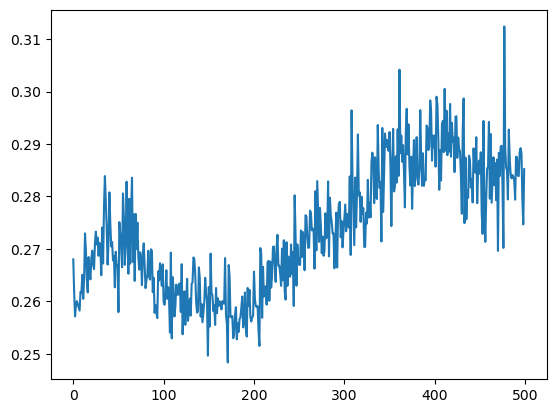

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])